In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy

warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data = pd.read_csv('loan.csv')
#metadata = pd.read_excel('Data_Dictionary.xlsx')
data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0           Jan-85               1                     NaN   
1           Apr-99               5                     NaN   
2           Nov-01               2                     NaN   
3           Feb-96               1                    35.0   
4           Jan-96               0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal revol_util  total_acc  \
0                     NaN         3        0      13648     83.70%          9   
1                     NaN         3        0       1687      9.40%          4   
2                     NaN         2        0       2956     98.50%         10   
3                     NaN        10        0       5598        21%         37   
4                     NaN        15        0      27783     53.90%         38   

  initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0                   f       0.00           0.00   5863.155187   
1                   f       0.00           0.00   1008.710000   
2                   f       0.00           0.00   3005.666844   
3                   f       0.00           0.00  12231.890000   
4                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16     

In [4]:
data.shape

(39717, 111)

# Data Cleaning
```
1. Null data
    -> Remove Data
    -> Impute Data
2. Fix data types
3. Duplicate Data
4. Drop un-useful columns like ID
```

In [5]:
# finding no of rows with all na data
data.isna().all(axis = 0).sum()

54

In [6]:
# there are columns with all na values or just single value these would not add any value in anylasis and can be dropped, also those columns which have unique values for all columns would also not add any value to anylasis like accountIds, loanIds etc
data.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [7]:
# looping through all columsn and extracting those which have all null values or just single value
columns = data.columns
drop_cols = []
size = len(data)
for col in columns:
    if size == data[col].isna().sum() or data[col].nunique() == 1 or data[col].nunique() == size:
        drop_cols.append(col)
        
print(data.shape)        
data = data.drop(drop_cols, axis = 1)
print(drop_cols)
print(data.shape)        

(39717, 111)
['id', 'member_id', 'pymnt_plan', 'url', 'initial_list_status', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sat

# Univariate anylasis
```
Feature Type
    1. Continous
        -> Histogram
        -> Stastical Descriptions (Mean, Median min and max etc)
        -> Box Plots (detect outliers)
    2. Categorical
        -> Un-Ordered Categorical Variables
            -> Rank Frequency Distribution
            -> Bar Chart
            -> Pie Chart
        -> Ordered Categorical Variables
            -> Histograms
            -> Bar chart
```     
Segmented univariate anylasis  

In [8]:
data.nunique()

loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
desc                       26527
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
mths_since_last_delinq        95
mths_since_last_record       111
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

In [9]:
# check percentage of null values in each column
# columns with more than 50% null can also be dropped which are mths_since_last_delinq, mths_since_last_record, next_pymnt_d
# remaning are emp_title, desc, title, revol_util, last_pymnt_d, pub_rec_bankruptcies
(data.isna().sum()/size)*100

loan_amnt                   0.000000
funded_amnt                 0.000000
funded_amnt_inv             0.000000
term                        0.000000
int_rate                    0.000000
installment                 0.000000
grade                       0.000000
sub_grade                   0.000000
emp_title                   6.191303
emp_length                  2.706650
home_ownership              0.000000
annual_inc                  0.000000
verification_status         0.000000
issue_d                     0.000000
loan_status                 0.000000
desc                       32.580507
purpose                     0.000000
title                       0.027696
zip_code                    0.000000
addr_state                  0.000000
dti                         0.000000
delinq_2yrs                 0.000000
earliest_cr_line            0.000000
inq_last_6mths              0.000000
mths_since_last_delinq     64.662487
mths_since_last_record     92.985372
open_acc                    0.000000
p

In [10]:
print(data.shape)
# also dropping desc as it contains majorly null values
data = data.drop(['next_pymnt_d', 'mths_since_last_record', 'mths_since_last_delinq', 'desc', 'out_prncp', 'out_prncp_inv'], axis = 1)
print(data.shape)

(39717, 45)
(39717, 39)


In [11]:
# method to impute nan will be based of type of column - emp_title, desc, title, revol_util, last_pymnt_d, pub_rec_bankruptcies
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_title                37258 non-null  object 
 9   emp_length               38642 non-null  object 
 10  home_ownership           39717 non-null  object 
 11  annual_inc               39717 non-null  float64
 12  verification_status      39717 non-null  object 
 13  issue_d                  39717 non-null  object 
 14  loan_status           

In [12]:
# using simplictic approach to drop row with null data
print(data.isna().sum().sum())
data = data.dropna()
print(data.isna().sum().sum())

4365
0


In [13]:
data.shape

(36433, 39)

### Fixting data types

In [14]:
# fixing data types
#data.term = data.term.apply(lambda x: float(x.replace(' months', '')))
data.int_rate = data.int_rate.apply(lambda x: float(x.replace('%', '')))
data.revol_util = data.revol_util.apply(lambda x: float(x.replace('%', '')))#(lambda x: float(x.replace('%', '')))


In [15]:
# issue_d date type attribute
data.describe().T

count          mean           std      min  \
loan_amnt                36433.0  11307.679851   7433.859357   500.00   
funded_amnt              36433.0  11032.834244   7166.484281   500.00   
funded_amnt_inv          36433.0  10601.325781   7072.842604     0.00   
int_rate                 36433.0     12.073862      3.734758     5.42   
installment              36433.0    326.186394    207.389943    16.08   
annual_inc               36433.0  69305.224255  63542.442054  4000.00   
dti                      36433.0     13.444131      6.643308     0.00   
delinq_2yrs              36433.0      0.146131      0.492199     0.00   
inq_last_6mths           36433.0      0.864930      1.063430     0.00   
open_acc                 36433.0      9.351604      4.373772     2.00   
pub_rec                  36433.0      0.053715      0.234995     0.00   
revol_bal                36433.0  13465.657481  15702.093047     0.00   
revol_util               36433.0     49.276251     28.191811     0.00   
total_acc                36433.0     22.245876     11.376692     2.00   
total_pymnt              36433.0  12310.968657   9048.420885    33.73   
total_pymnt_inv          36433.0  11841.070656   8911.319070     0.00   
total_rec_prncp          36433.0   9912.408471   7053.212865     0.00   
total_rec_int            36433.0   2304.404937   2629.542911     6.22   
total_rec_late_fee       36433.0      1.299840      7.065629     0.00   
recoveries               36433.0     92.855490    682.047187     0.00   
collection_recovery_fee  36433.0     11.677065    140.880327     0.00   
last_pymnt_amnt          36433.0   2742.955476   4473.528922     0.01   
pub_rec_bankruptcies     36433.0      0.041418      0.200221     0.00   

                                  25%           50%          75%           max  
loan_amnt                 5600.000000  10000.000000  15000.00000  3.500000e+04  
funded_amnt               5500.000000  10000.000000  15000.00000  3.500000e+04  
funded_amnt_inv           5000.000000   9202.846434  14508.45415  3.500000e+04  
int_rate                     9.320000     11.860000     14.65000  2.440000e+01  
installment                168.900000    283.280000    432.22000  1.305190e+03  
annual_inc               42000.000000  60000.000000  83000.00000  6.000000e+06  
dti                          8.360000     13.540000     18.69000  2.999000e+01  
delinq_2yrs                  0.000000      0.000000      0.00000  1.100000e+01  
inq_last_6mths               0.000000      1.000000      1.00000  8.000000e+00  
open_acc                     6.000000      9.000000     12.00000  4.400000e+01  
pub_rec                      0.000000      0.000000      0.00000  4.000000e+00  
revol_bal                 3832.000000   9030.000000  17231.00000  1.495880e+05  
revol_util                  26.100000     49.900000     72.70000  9.990000e+01  
total_acc                   14.000000     21.000000     29.00000  9.000000e+01  
total_pymnt               5672.557913  10101.589360  16700.71998  5.856368e+04  
total_pymnt_inv           5413.410000   9632.040000  16094.49000  5.856368e+04  
total_rec_prncp           4800.000000   8123.600000  14000.00000  3.500002e+04  
total_rec_int              678.010000   1379.820000   2891.86000  2.356368e+04  
total_rec_late_fee           0.000000      0.000000      0.00000  1.802000e+02  
recoveries                   0.000000      0.000000      0.00000  2.962335e+04  
collection_recovery_fee      0.000000      0.000000      0.00000  7.002190e+03  
last_pymnt_amnt            226.280000    571.700000   3457.58000  3.611520e+04  
pub_rec_bankruptcies         0.000000      0.000000      0.00000  2.000000e+00

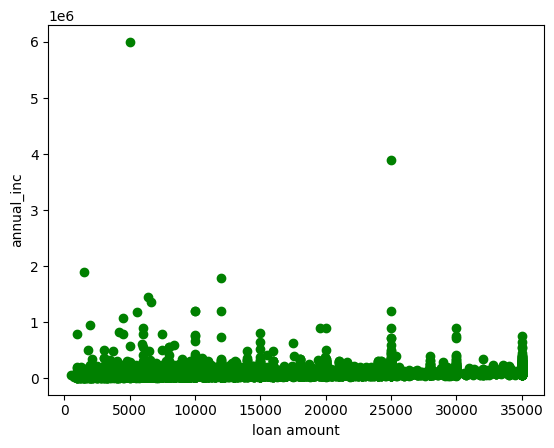

In [16]:
plt.scatter(data[data.loan_status == 'Fully Paid'].loan_amnt, data[data.loan_status == 'Fully Paid'].annual_inc, c= 'Green')
#plt.scatter(data[data.loan_status == 'Charged Off'].loan_amnt, data[data.loan_status == 'Charged Off'].annual_inc, c= 'Yellow')
#plt.scatter(data[data.loan_status == 'Current'].loan_amnt, data[data.loan_status == 'Current'].annual_inc, c= 'Cyan')
plt.xlabel("loan amount")
plt.ylabel("annual_inc")
plt.show()

In [17]:
data.last_pymnt_d.apply(lambda x: 'NA' if type(x) == float else x.split('-')[0])

1        Apr
3        Jan
4        May
5        Jan
6        May
7        Jan
9        Nov
10       Jun
11       Sep
12       Jul
13       Jan
14       Oct
15       Jan
16       Jan
17       May
18       Feb
19       Jul
20       Aug
21       Sep
22       Jan
23       Oct
24       Oct
25       Sep
27       Dec
28       Apr
29       Dec
31       Aug
32       May
33       Jan
34       Jan
35       Jan
36       Nov
37       Jan
38       Apr
39       May
40       Jan
41       Jan
43       Jan
44       Jul
45       Jan
46       Aug
47       Jan
48       Jul
49       Jan
50       Oct
51       Jan
52       Jan
53       Aug
54       Jul
55       Oct
56       Oct
57       Jul
58       Aug
59       Jan
60       Jan
62       Aug
63       Dec
64       Apr
65       Jan
66       Feb
67       Nov
68       Jun
69       Sep
70       Apr
71       Oct
72       Sep
73       Jan
74       Jan
75       Jun
76       Oct
77       Sep
78       Aug
79       Oct
80       Feb
81       Jul
82       Jan
83       Jan

In [18]:
# convert issue_d, last_pymnt_d, last_credit_pull_d  to month and year
# earliest_cr_line
data['issue_d_month'] = data.issue_d.apply(lambda x: x.split('-')[0])
data['issue_d_year'] = data.issue_d.apply(lambda x: x.split('-')[1])

data['last_pymnt_d_month'] = data.last_pymnt_d.apply(lambda x: x.split('-')[0])
data['last_pymnt_d_year'] = data.last_pymnt_d.apply(lambda x: x.split('-')[1])

data['last_credit_pull_d_month'] = data.last_pymnt_d.apply(lambda x: x.split('-')[0])
data['last_credit_pull_d_year'] = data.last_pymnt_d.apply(lambda x: x.split('-')[1])

data.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
1       2500         2500           2500.0   60 months     15.27        59.83   
3      10000        10000          10000.0   36 months     13.49       339.31   
4       3000         3000           3000.0   60 months     12.69        67.79   
5       5000         5000           5000.0   36 months      7.90       156.46   
6       7000         7000           7000.0   60 months     15.96       170.08   

  grade sub_grade                  emp_title emp_length home_ownership  \
1     C        C4                      Ryder   < 1 year           RENT   
3     C        C1        AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5   University Medical Group     1 year           RENT   
5     A        A4       Veolia Transportaton    3 years           RENT   
6     C        C5  Southern Star Photography    8 years           RENT   

   annual_inc verification_status issue_d  loan_status             purpose  \
1     30000.0     Source Verified  Dec-11  Charged Off                 car   
3     49200.0     Source Verified  Dec-11   Fully Paid               other   
4     80000.0     Source Verified  Dec-11      Current               other   
5     36000.0     Source Verified  Dec-11   Fully Paid             wedding   
6     47004.0        Not Verified  Dec-11   Fully Paid  debt_consolidation   

                                   title zip_code addr_state    dti  \
1                                   bike    309xx         GA   1.00   
3                               personel    917xx         CA  20.00   
4                               Personal    972xx         OR  17.94   
5  My wedding loan I promise to pay back    852xx         AZ  11.20   
6                                   Loan    280xx         NC  23.51   

   delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
1            0           Apr-99               5         3        0       1687   
3            0           Feb-96               1        10        0       5598   
4            0           Jan-96               0        15        0      27783   
5            0           Nov-04               3         9        0       7963   
6            0           Jul-05               1         7        0      17726   

   revol_util  total_acc  total_pymnt  total_pymnt_inv  total_rec_prncp  \
1         9.4          4      1008.71          1008.71           456.46   
3        21.0         37     12231.89         12231.89         10000.00   
4        53.9         38      3513.33          3513.33          2475.94   
5        28.3         12      5632.21          5632.21          5000.00   
6        85.6         11     10110.84         10110.84          6985.61   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
1         435.17                0.00      117.08                     1.11   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   
5         632.21                0.00        0.00                     0.00   
6        3125.23                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt last_credit_pull_d  pub_rec_bankruptcies  \
1       Apr-13           119.66             Sep-13                   0.0   
3       Jan-15           357.48             Apr-16                   0.0   
4       May-16            67.79             May-16                   0.0   
5       Jan-15           161.03             Jan-16                   0.0   
6       May-16          1313.76             May-16                   0.0   

  issue_d_month issue_d_year last_pymnt_d_month last_pymnt_d_year  \
1           Dec           11                Apr                13   
3           Dec           11                Jan                15   
4           Dec           11                May                16   
5           Dec           11             

In [19]:
# For object of anylasis we are intrested in just 2 target variables - fully_paid, charged_off. 
# Third target variable is not need and we can have 2 approach to handle it either drop all row with this value to treat it as 
# fully paid or charged off. Better approach is to drop this data as in other approach this would influence for good or worse 
# anylasis of other datapoints and might create misleading results
print(data.loan_status.value_counts())
print(data.shape)
data = data[data.loan_status != 'Current']
print(data.shape)

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64
(36433, 45)
(35367, 45)


In [20]:
# seprating columns based on their datatype for anylasis anylasis method differs based on datatype
data_c = data.select_dtypes(include='object')
print(data_c.info())
data_q = data.select_dtypes(exclude='object')
print(data_q.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   term                      35367 non-null  object
 1   grade                     35367 non-null  object
 2   sub_grade                 35367 non-null  object
 3   emp_title                 35367 non-null  object
 4   emp_length                35367 non-null  object
 5   home_ownership            35367 non-null  object
 6   verification_status       35367 non-null  object
 7   issue_d                   35367 non-null  object
 8   loan_status               35367 non-null  object
 9   purpose                   35367 non-null  object
 10  title                     35367 non-null  object
 11  zip_code                  35367 non-null  object
 12  addr_state                35367 non-null  object
 13  earliest_cr_line          35367 non-null  object
 14  last_pymnt_d          

### Checking for outliers

In [21]:
"""
Observations top possible outliers based on data spread and min/ max- 
1. annual_inc - has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 100 times
                indicates possible outlies.
2. revol_bal -  has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 16 times
                indicates possible outlies.
3. total_pymnt -    has huge spread(explained by standard devation) and difference between median(50 percentile) and max is 5 times
                indicates possible outlies.         
                
"""
data_q.describe().T

count          mean           std      min  \
loan_amnt                35367.0  11133.071790   7326.233093   500.00   
funded_amnt              35367.0  10866.525999   7069.586419   500.00   
funded_amnt_inv          35367.0  10427.124106   6968.341877     0.00   
int_rate                 35367.0     11.983468      3.702512     5.42   
installment              35367.0    324.043982    207.149088    16.08   
annual_inc               35367.0  69095.985393  63967.047428  4000.00   
dti                      35367.0     13.403961      6.636540     0.00   
delinq_2yrs              35367.0      0.146323      0.493060     0.00   
inq_last_6mths           35367.0      0.866995      1.064434     0.00   
open_acc                 35367.0      9.332004      4.374975     2.00   
pub_rec                  35367.0      0.054147      0.235734     0.00   
revol_bal                35367.0  13367.676733  15678.460397     0.00   
revol_util               35367.0     49.139015     28.228038     0.00   
total_acc                35367.0     22.209206     11.403045     2.00   
total_pymnt              35367.0  12020.407377   8817.192502    33.73   
total_pymnt_inv          35367.0  11544.554967   8671.919254     0.00   
total_rec_prncp          35367.0   9766.376425   6998.669475     0.00   
total_rec_int            35367.0   2157.070677   2410.568245     6.22   
total_rec_late_fee       35367.0      1.306102      7.090080     0.00   
recoveries               35367.0     95.654256    692.056592     0.00   
collection_recovery_fee  35367.0     12.029025    142.972962     0.00   
last_pymnt_amnt          35367.0   2813.592900   4521.490330     0.01   
pub_rec_bankruptcies     35367.0      0.041677      0.200560     0.00   

                                 25%           50%         75%           max  
loan_amnt                 5500.00000  10000.000000  15000.0000  3.500000e+04  
funded_amnt               5500.00000   9600.000000  15000.0000  3.500000e+04  
funded_amnt_inv           5000.00000   9000.000000  14300.0000  3.500000e+04  
int_rate                     8.94000     11.830000     14.4600  2.440000e+01  
installment                167.84000    280.620000    426.6400  1.305190e+03  
annual_inc               41500.00000  60000.000000  82500.0000  6.000000e+06  
dti                          8.32000     13.500000     18.6400  2.999000e+01  
delinq_2yrs                  0.00000      0.000000      0.0000  1.100000e+01  
inq_last_6mths               0.00000      1.000000      1.0000  8.000000e+00  
open_acc                     6.00000      9.000000     12.0000  4.400000e+01  
pub_rec                      0.00000      0.000000      0.0000  4.000000e+00  
revol_bal                 3782.00000   8934.000000  17064.5000  1.495880e+05  
revol_util                  25.90000     49.700000     72.6000  9.990000e+01  
total_acc                   14.00000     21.000000     29.0000  9.000000e+01  
total_pymnt               5602.51143   9865.711187  16300.4865  5.856368e+04  
total_pymnt_inv           5321.41500   9395.310000  15619.8100  5.856368e+04  
total_rec_prncp           4750.00000   8000.000000  13500.0000  3.500002e+04  
total_rec_int              662.23500   1331.960000   2722.9100  2.356368e+04  
total_rec_late_fee           0.00000      0.000000      0.0000  1.802000e+02  
recoveries                   0.00000      0.000000      0.0000  2.962335e+04  
collection_recovery_fee      0.00000      0.000000      0.0000  7.002190e+03  
last_pymnt_amnt            224.78500    602.580000   3604.4450  3.611520e+04  
pub_rec_bankruptcies         0.00000      0.000000      0.0000  2.000000e+00

count    3.536700e+04
mean     6.909599e+04
std      6.396705e+04
min      4.000000e+03
25%      4.150000e+04
50%      6.000000e+04
75%      8.250000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64


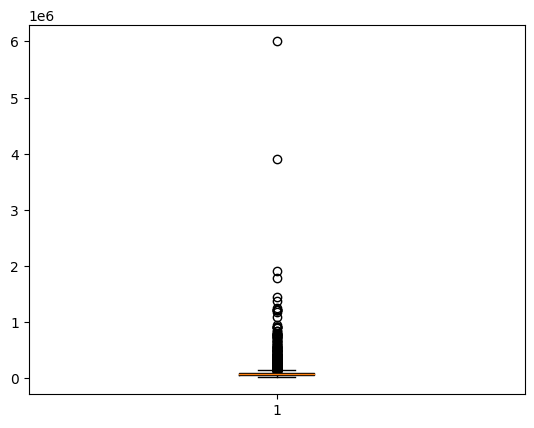

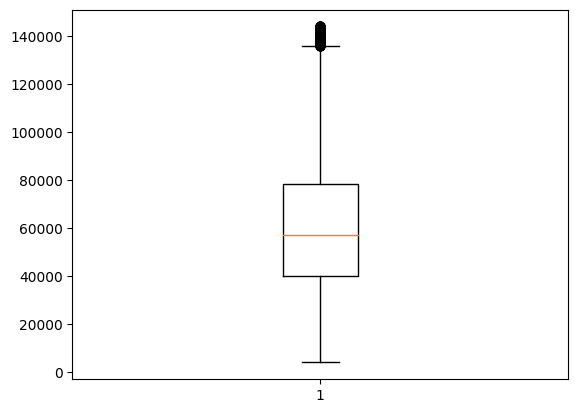

In [22]:
# Observation - distribution is mostly continous till 1.5 1e6 after that distribution is breaking - data seems sensible as 
# there are very few people with very high income but these datapoint would help much in current anylasis hence dropping them as 
# outliers Using 1.5IQR rule to detect and remove outliers.
print(data.annual_inc.describe())

plt.boxplot(data.annual_inc)
plt.show()
# print(data.annual_inc.quantile([0.75]).to_list()[0])
annual_inc_iqr = data.annual_inc.quantile([0.75]).to_list()[0] - data.annual_inc.quantile([0.25]).to_list()[0]
annual_inc_lower_bound = data.annual_inc.quantile([0.25]).to_list()[0] - (1.5 * annual_inc_iqr) # Q1 - 1.5 * IQR
annual_inc_upper_bound = data.annual_inc.quantile([0.75]).to_list()[0] + (1.5 * annual_inc_iqr) # Q3 - 1.5 * IQR

data = data[(data.annual_inc >= annual_inc_lower_bound) & (data.annual_inc <= annual_inc_upper_bound)]
data_q = data_q[(data_q.annual_inc >= annual_inc_lower_bound) & (data_q.annual_inc <= annual_inc_upper_bound)]

plt.boxplot(data.annual_inc)
plt.show()

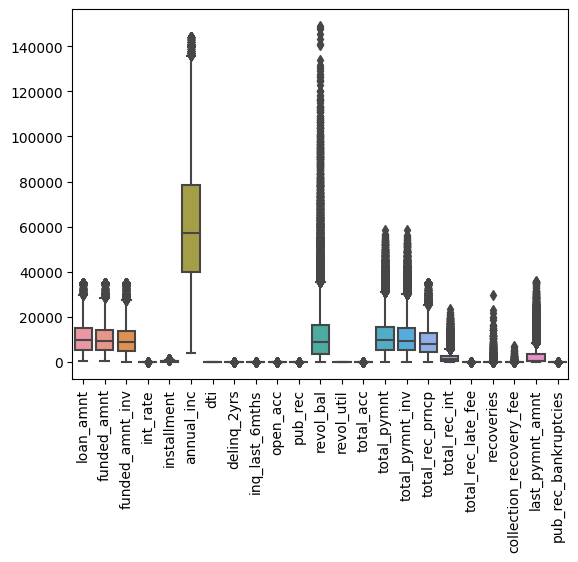

In [23]:
# Looking at data distribution for other quantitive scale of some variables if dominating others
sns.boxplot(data_q)
plt.xticks(rotation = 90)
plt.show()

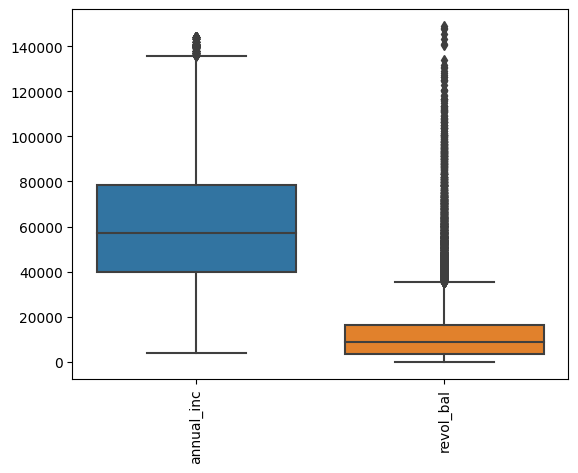

In [24]:
# data is roughly continous so skipping outlier removal
sns.boxplot(data_q[['annual_inc', 'revol_bal']])
plt.xticks(rotation = 90)
plt.show()

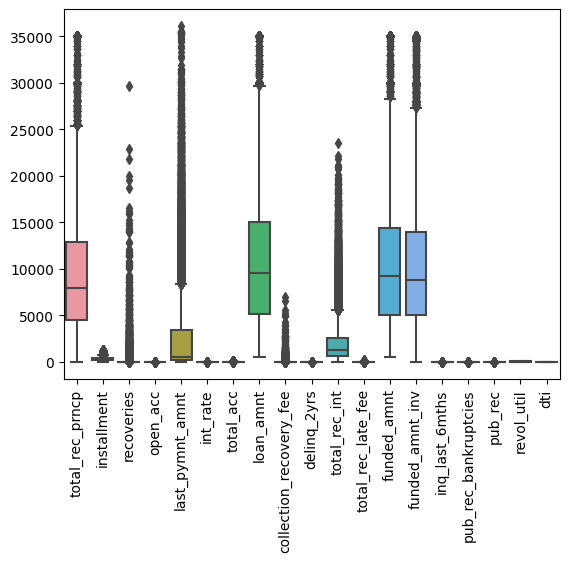

In [25]:
# data is roughly continous so skipping outlier removal except for column recoveries
sns.boxplot(data_q[list(set(data_q.columns.to_list()) - set(['annual_inc', 'revol_bal', 'total_pymnt', 'total_pymnt_inv']))])
plt.xticks(rotation = 90)
plt.show()

0.25       0.000
0.50       0.000
0.75       0.000
0.85       0.000
0.90      13.572
0.95     361.731
0.99    1912.759
Name: recoveries, dtype: float64


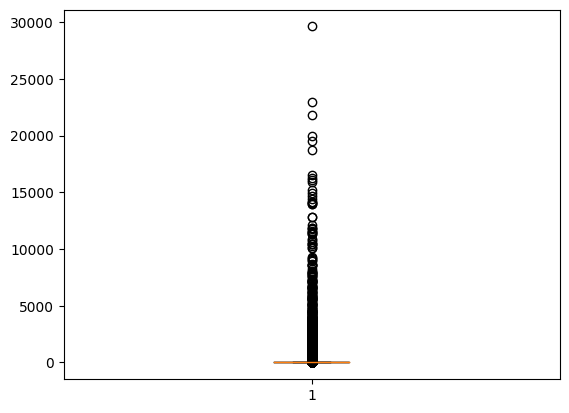

In [26]:
# removing outliers from recoveries
print(data.recoveries.quantile([0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99]))

plt.boxplot(data.recoveries)
plt.show()

# data distribution is very skwed(85% of the values are 0) appliying 1.5IQR would drop all data hence skipping outlier removal here as well

In [27]:
print(data_c.nunique())
# dropping columns which are not relevant to anylasis also dropping columns for which we have created derived metrics - issue_d, last_pymnt_d, last_credit_pull_d 
data_c = data_c.drop(['emp_title', 'title', 'zip_code', 'earliest_cr_line', 'last_credit_pull_d', 'last_pymnt_d', 'issue_d'], axis = 1)
print(data_c.nunique())

term                            2
grade                           7
sub_grade                      35
emp_title                   27414
emp_length                     11
home_ownership                  4
verification_status             3
issue_d                        52
loan_status                     2
purpose                        14
title                       17662
zip_code                      805
addr_state                     49
earliest_cr_line              509
last_pymnt_d                   97
last_credit_pull_d             96
issue_d_month                  12
issue_d_year                    5
last_pymnt_d_month             12
last_pymnt_d_year               9
last_credit_pull_d_month       12
last_credit_pull_d_year         9
dtype: int64
term                         2
grade                        7
sub_grade                   35
emp_length                  11
home_ownership               4
verification_status          3
loan_status                  2
purpose               

In [28]:
print(len(data_c.nunique()))

15


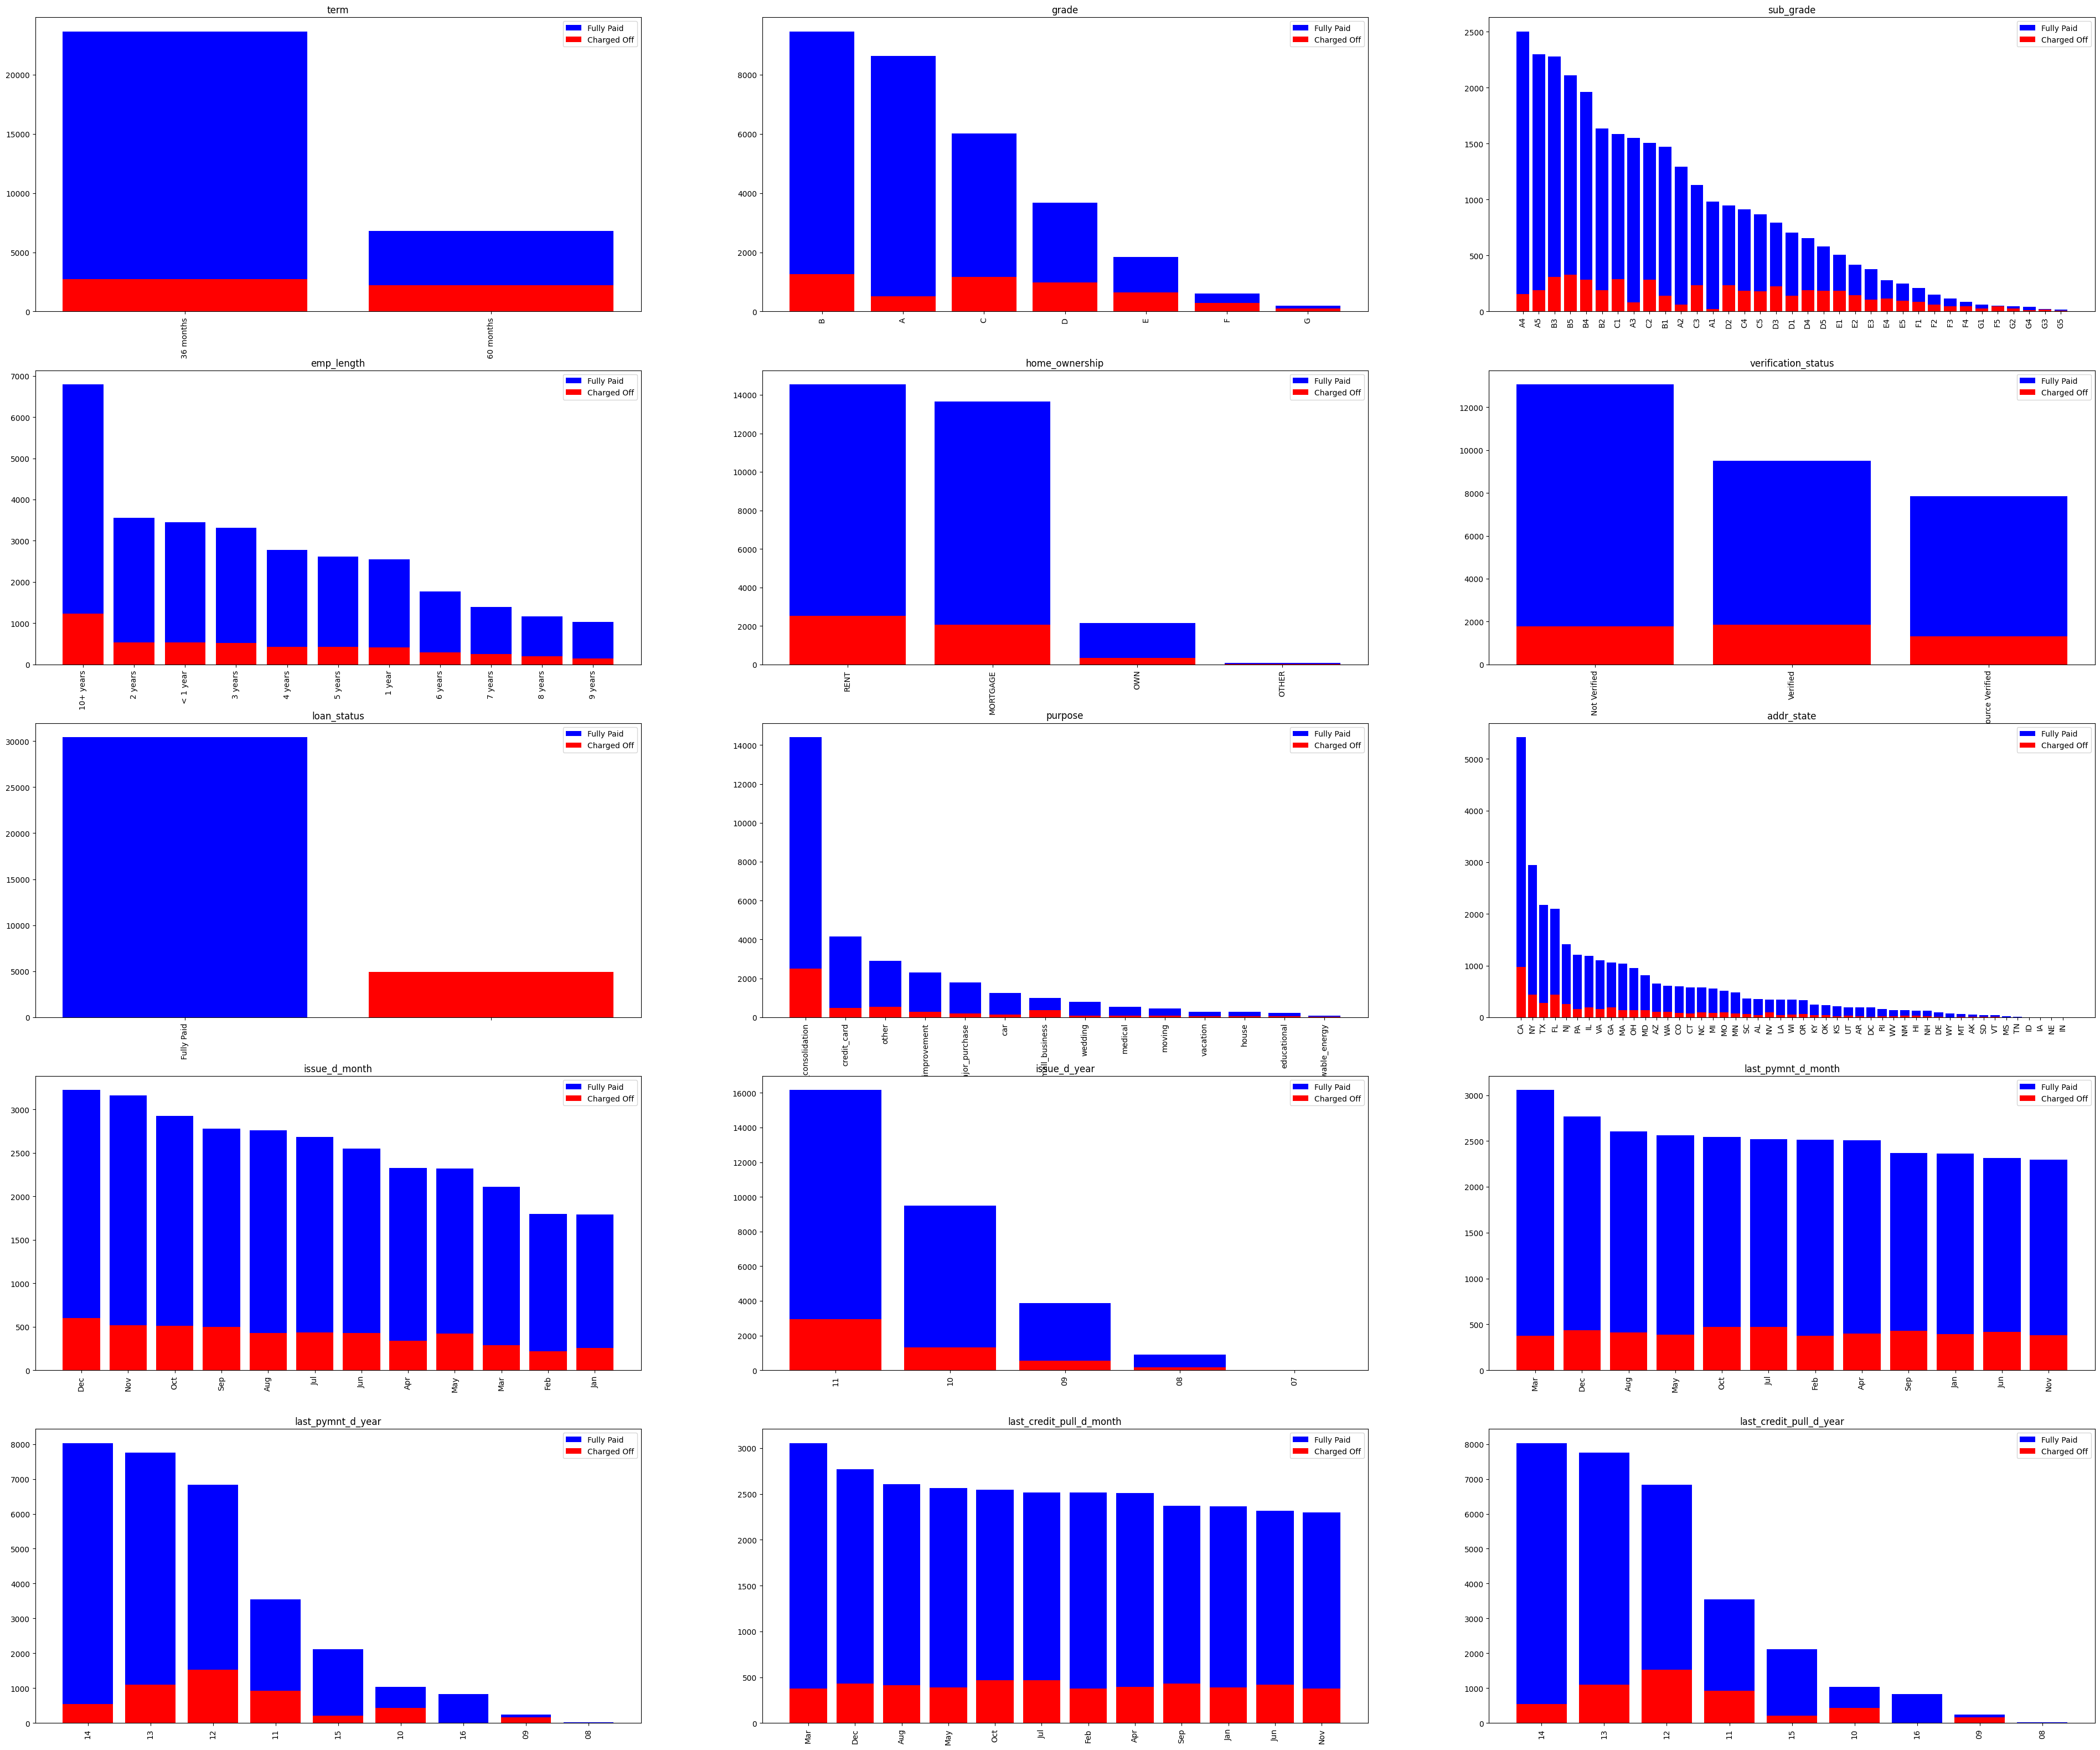

In [29]:
fig, ax = plt.subplots(ncols=3, nrows=5, figsize=(48, 40))
ind = 0
data_features = data_c.columns.to_list()

for i in range(5):
    for j in range(3):
        fp = ax[i][j].bar(data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().index.to_list(), data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().values, color='blue')
        df = ax[i][j].bar(data_c[data_c['loan_status'] == 'Charged Off'][data_features[ind]].value_counts().index.to_list(), data_c[data_c['loan_status'] == 'Charged Off'][data_features[ind]].value_counts().values, color='red')
        ax[i][j].legend((fp, df), ('Fully Paid', 'Charged Off'))
        ax[i][j].set_title(data_features[ind])
        ax[i][j].set_xticklabels(data_c[data_c['loan_status'] == 'Fully Paid'][data_features[ind]].value_counts().index.to_list(), rotation = 90)
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.show()

# Observations

1. **term** - 60 months loans have greater probablity(15% more) of default as compared to 36 month loans
2. **grade, sub_grade** - (assigning a quality score to a loan based on a borrower's credit history) here by implicit load grade represent probablity of loan not defalting. Data also reflects the same probablity of default is in descending order starting from A to E and 1 to 5
3. **emp_length** - there is no significant difference in default rate across this feature. Default rate ranges from 12 to 15 percent
4. **home_ownership** - There is no significant difference in MORGAGE, RENT and OWN type ownership. In terms of probablity OTHER type has highest default rate but there are significantly less data points in this category as compared to other hence it is not conclusive.
5. **verification_status** - Here suprisingly loans which are verified have highest default changes(16.7%) and loans which are not verified have lowest default changes(12.9%). Source Verified is in between.
6. **purpose** - majority of the loans are given under debt_consolidation purpose. Category with most default is small_buisness(26%) followed by renewable_energy which is 17%. 
7. **addr_state** - Addr State is following power law distribution. NV has max default rate
8. **issue_d** - Max no of loans are funded towards end of year(Q3) which may be to holiday season and people buying new things. There is not significant variance in default rate across months. Default rate is ranging from 12% to 15%
9. **issue_d_year** - Distribution is almost power law. Max no of loans are given in year 11 and min no of loans were given out in year 07 with max default rate of 33%.

## Bivariate anylasis
1. data correlation
2. binning method to correlate continous data with defaults

In [30]:
data_q.describe().T

count          mean           std      min  \
loan_amnt                33747.0  10801.040092   7057.313346   500.00   
funded_amnt              33747.0  10550.100009   6810.850145   500.00   
funded_amnt_inv          33747.0  10126.591112   6712.120860     0.00   
int_rate                 33747.0     11.937646      3.678590     5.42   
installment              33747.0    314.527898    198.927948    16.08   
annual_inc               33747.0  61719.146652  27763.774295  4000.00   
dti                      33747.0     13.563473      6.626468     0.00   
delinq_2yrs              33747.0      0.144517      0.490356     0.00   
inq_last_6mths           33747.0      0.860314      1.058608     0.00   
open_acc                 33747.0      9.229294      4.326691     2.00   
pub_rec                  33747.0      0.055353      0.237943     0.00   
revol_bal                33747.0  12466.474738  13751.252233     0.00   
revol_util               33747.0     49.045972     28.164265     0.00   
total_acc                33747.0     21.818088     11.223225     2.00   
total_pymnt              33747.0  11630.498454   8453.839203    33.73   
total_pymnt_inv          33747.0  11173.356118   8314.140696     0.00   
total_rec_prncp          33747.0   9460.173740   6722.404687     0.00   
total_rec_int            33747.0   2076.487013   2305.047006     6.22   
total_rec_late_fee       33747.0      1.275649      6.960847     0.00   
recoveries               33747.0     92.562133    671.583353     0.00   
collection_recovery_fee  33747.0     11.378613    136.154181     0.00   
last_pymnt_amnt          33747.0   2709.315438   4357.337500     0.01   
pub_rec_bankruptcies     33747.0      0.042670      0.202848     0.00   

                                  25%           50%           75%  \
loan_amnt                 5200.000000   9600.000000  15000.000000   
funded_amnt               5100.000000   9250.000000  14400.000000   
funded_amnt_inv           5000.000000   8800.000000  13950.000000   
int_rate                     8.940000     11.830000     14.420000   
installment                165.380000    273.840000    411.615000   
annual_inc               40000.000000  57000.000000  78281.170000   
dti                          8.510000     13.710000     18.810000   
delinq_2yrs                  0.000000      0.000000      0.000000   
inq_last_6mths               0.000000      1.000000      1.000000   
open_acc                     6.000000      9.000000     12.000000   
pub_rec                      0.000000      0.000000      0.000000   
revol_bal                 3676.000000   8689.000000  16331.500000   
revol_util                  25.900000     49.500000     72.400000   
total_acc                   13.000000     20.000000     28.000000   
total_pymnt               5526.650852   9579.658188  15698.606055   
total_pymnt_inv           5212.100000   9143.070000  15101.805000   
total_rec_prncp           4500.000000   8000.000000  12875.000000   
total_rec_int              646.525000   1290.860000   2618.365000   
total_rec_late_fee           0.000000      0.000000      0.000000   
recoveries                   0.000000      0.000000      0.000000   
collection_recovery_fee      0.000000      0.000000      0.000000   
last_pymnt_amnt            219.855000    575.390000   3483.765000   
pub_rec_bankruptcies         0.000000      0.000000      0.000000   

                                  max  
loan_amnt                 35000.00000  
funded_amnt               35000.00000  
funded_amnt_inv           35000.00000  
int_rate                     24.40000  
installment                1305.19000  
annual_inc               144000.00000  
dti                          29.99000  
delinq_2yrs                  11.00000  
inq_last_6mths                8.00000  
open_acc                     44.00000  
pub_rec                       4.00000  
revol_bal                149000.00000  
revol_util                   99.90000  
total_acc                    90.00000  
total_pymnt      

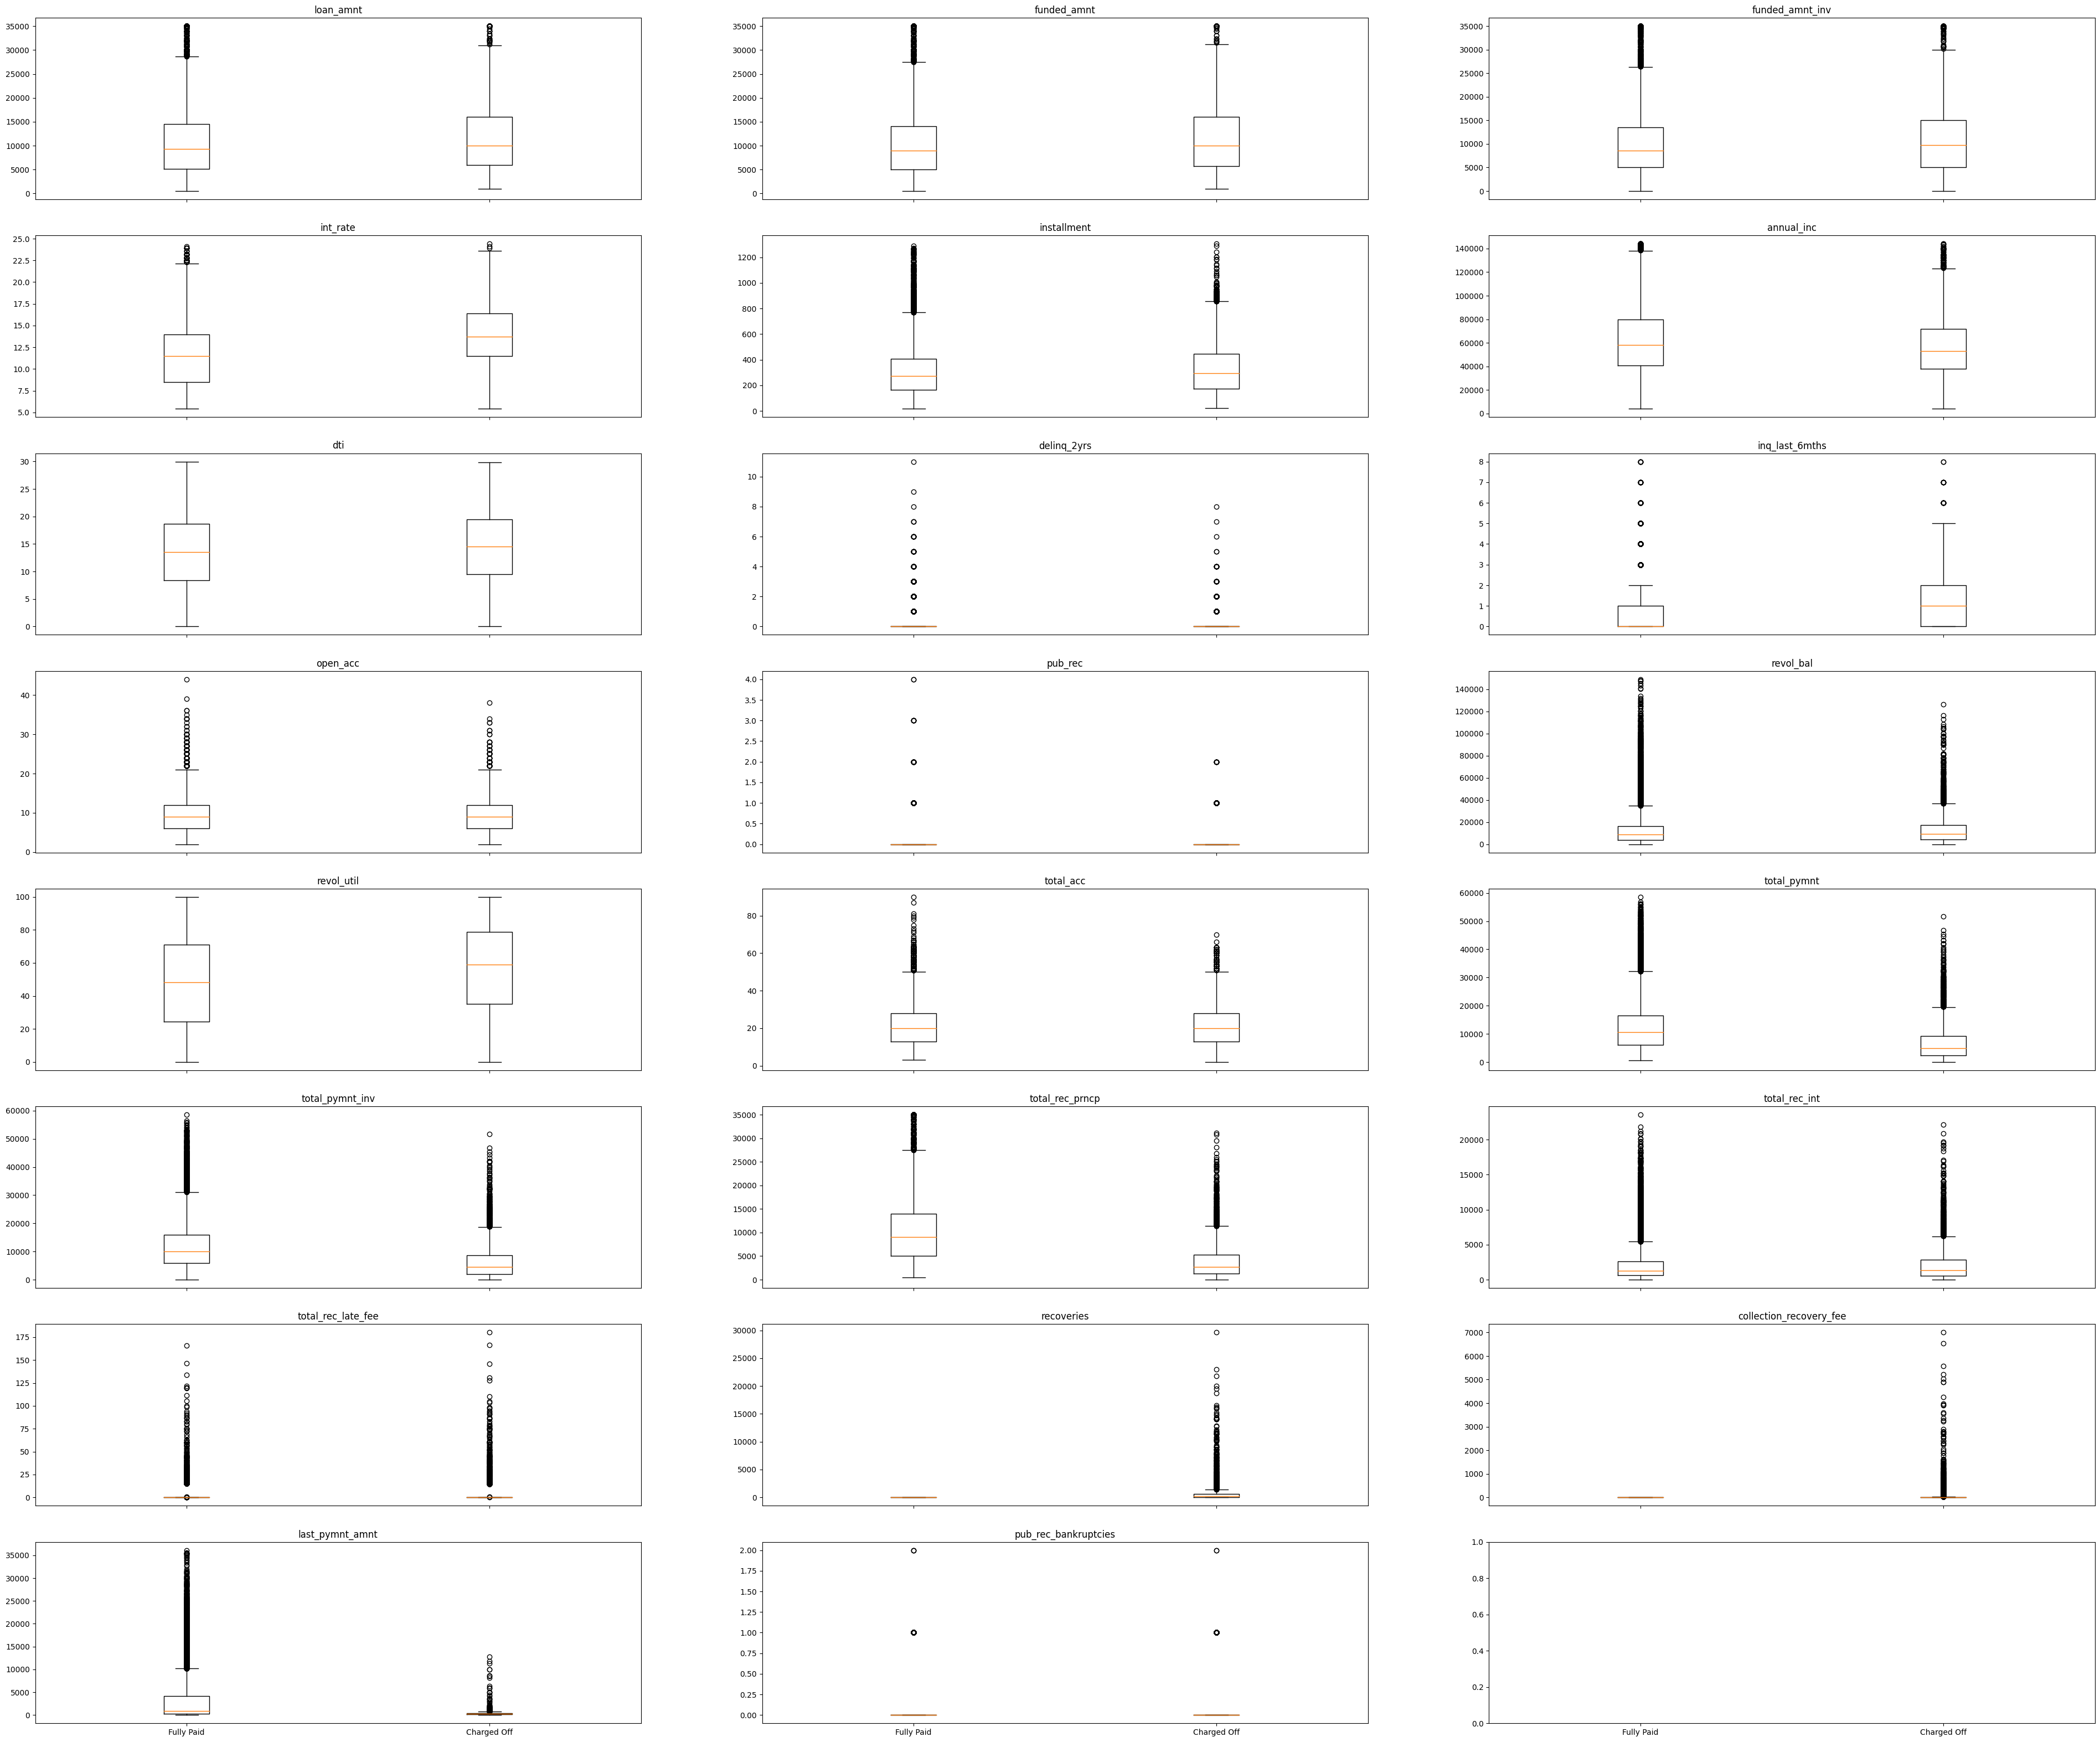

In [31]:
# use box plot to explore relation between continous variable and categorical variable
# segmented univariate anylasis
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(48, 40), sharex = True)
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        ax[i][j].boxplot([data[data['loan_status'] == 'Fully Paid'][data_features[ind]], data[data['loan_status'] == 'Charged Off'][data_features[ind]]])
        ax[i][j].set_title(data_features[ind])
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.xticks((1,2),["Fully Paid", "Charged Off"])            
plt.show()

# plt.boxplot([data[data['loan_status'] == 'Fully Paid'].loan_amnt, data[data['loan_status'] == 'Charged Off'].loan_amnt])
# plt.xticks((1,2),["Fully Paid", "Charged Off"])
# plt.show()

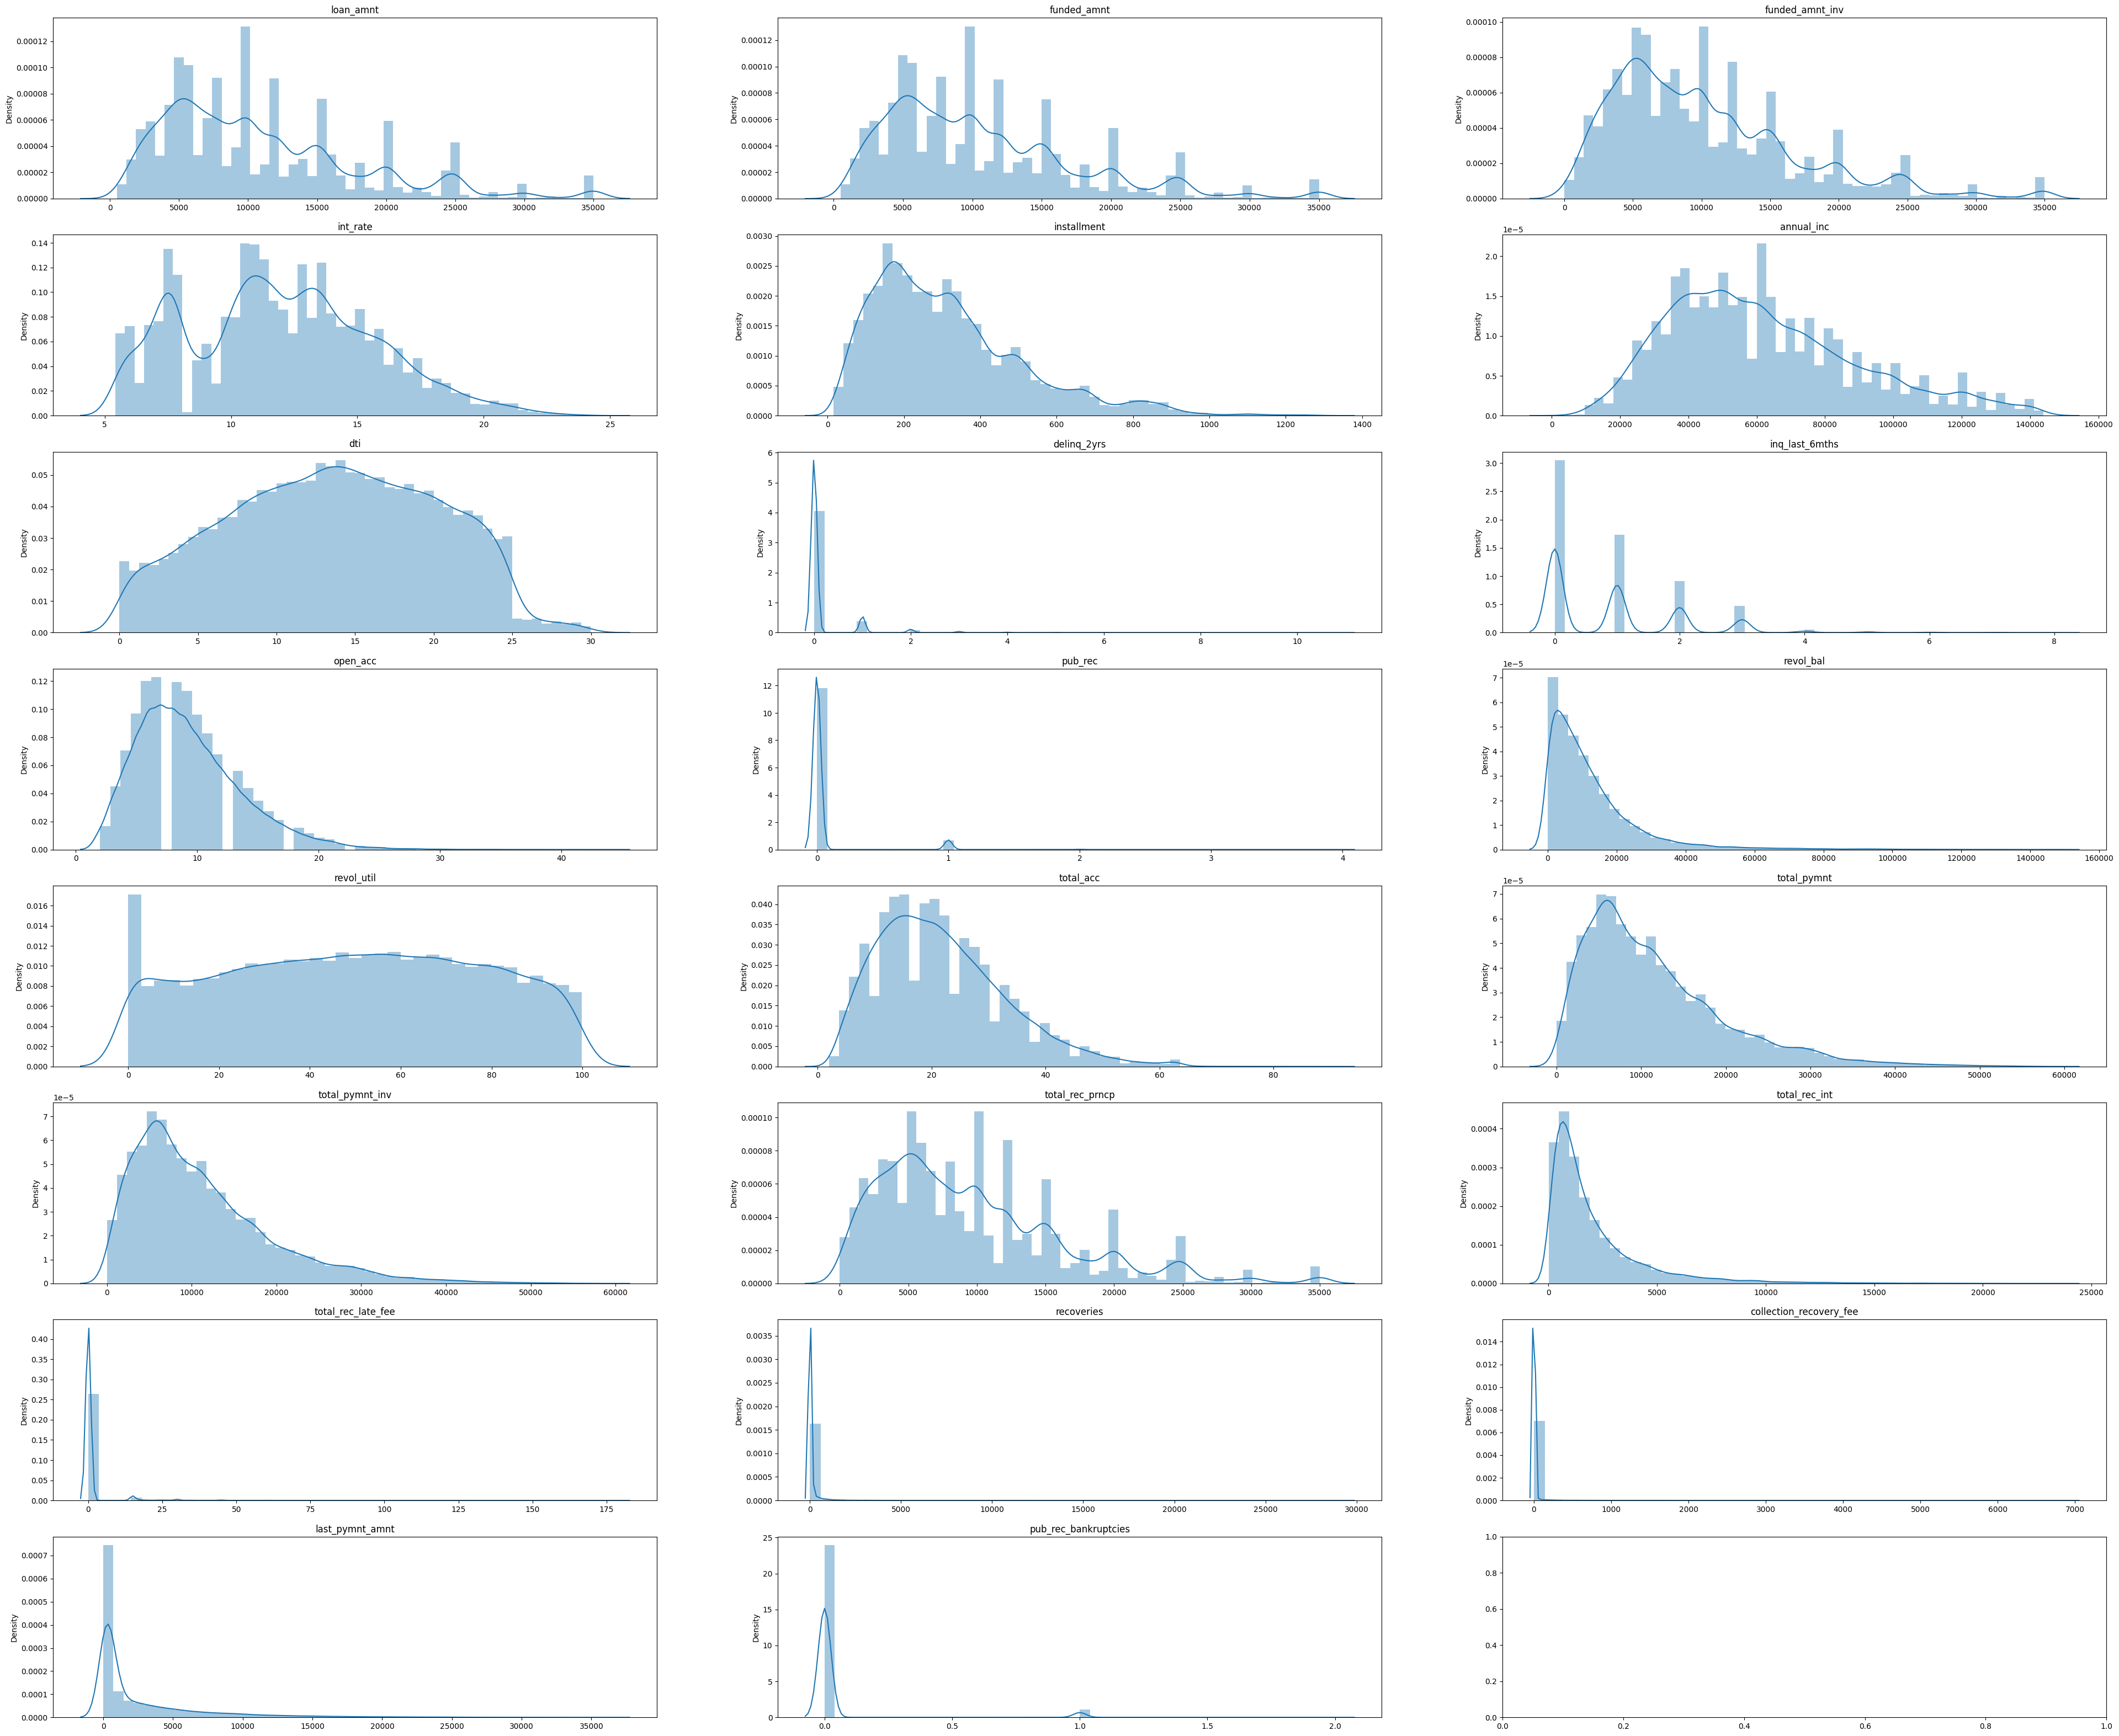

In [32]:
# Overall distribution of data
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(48, 40))
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        sns.distplot(ax = ax[i][j], x = data[data_features[ind]])
        ax[i][j].set_title(data_features[ind])
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.show()


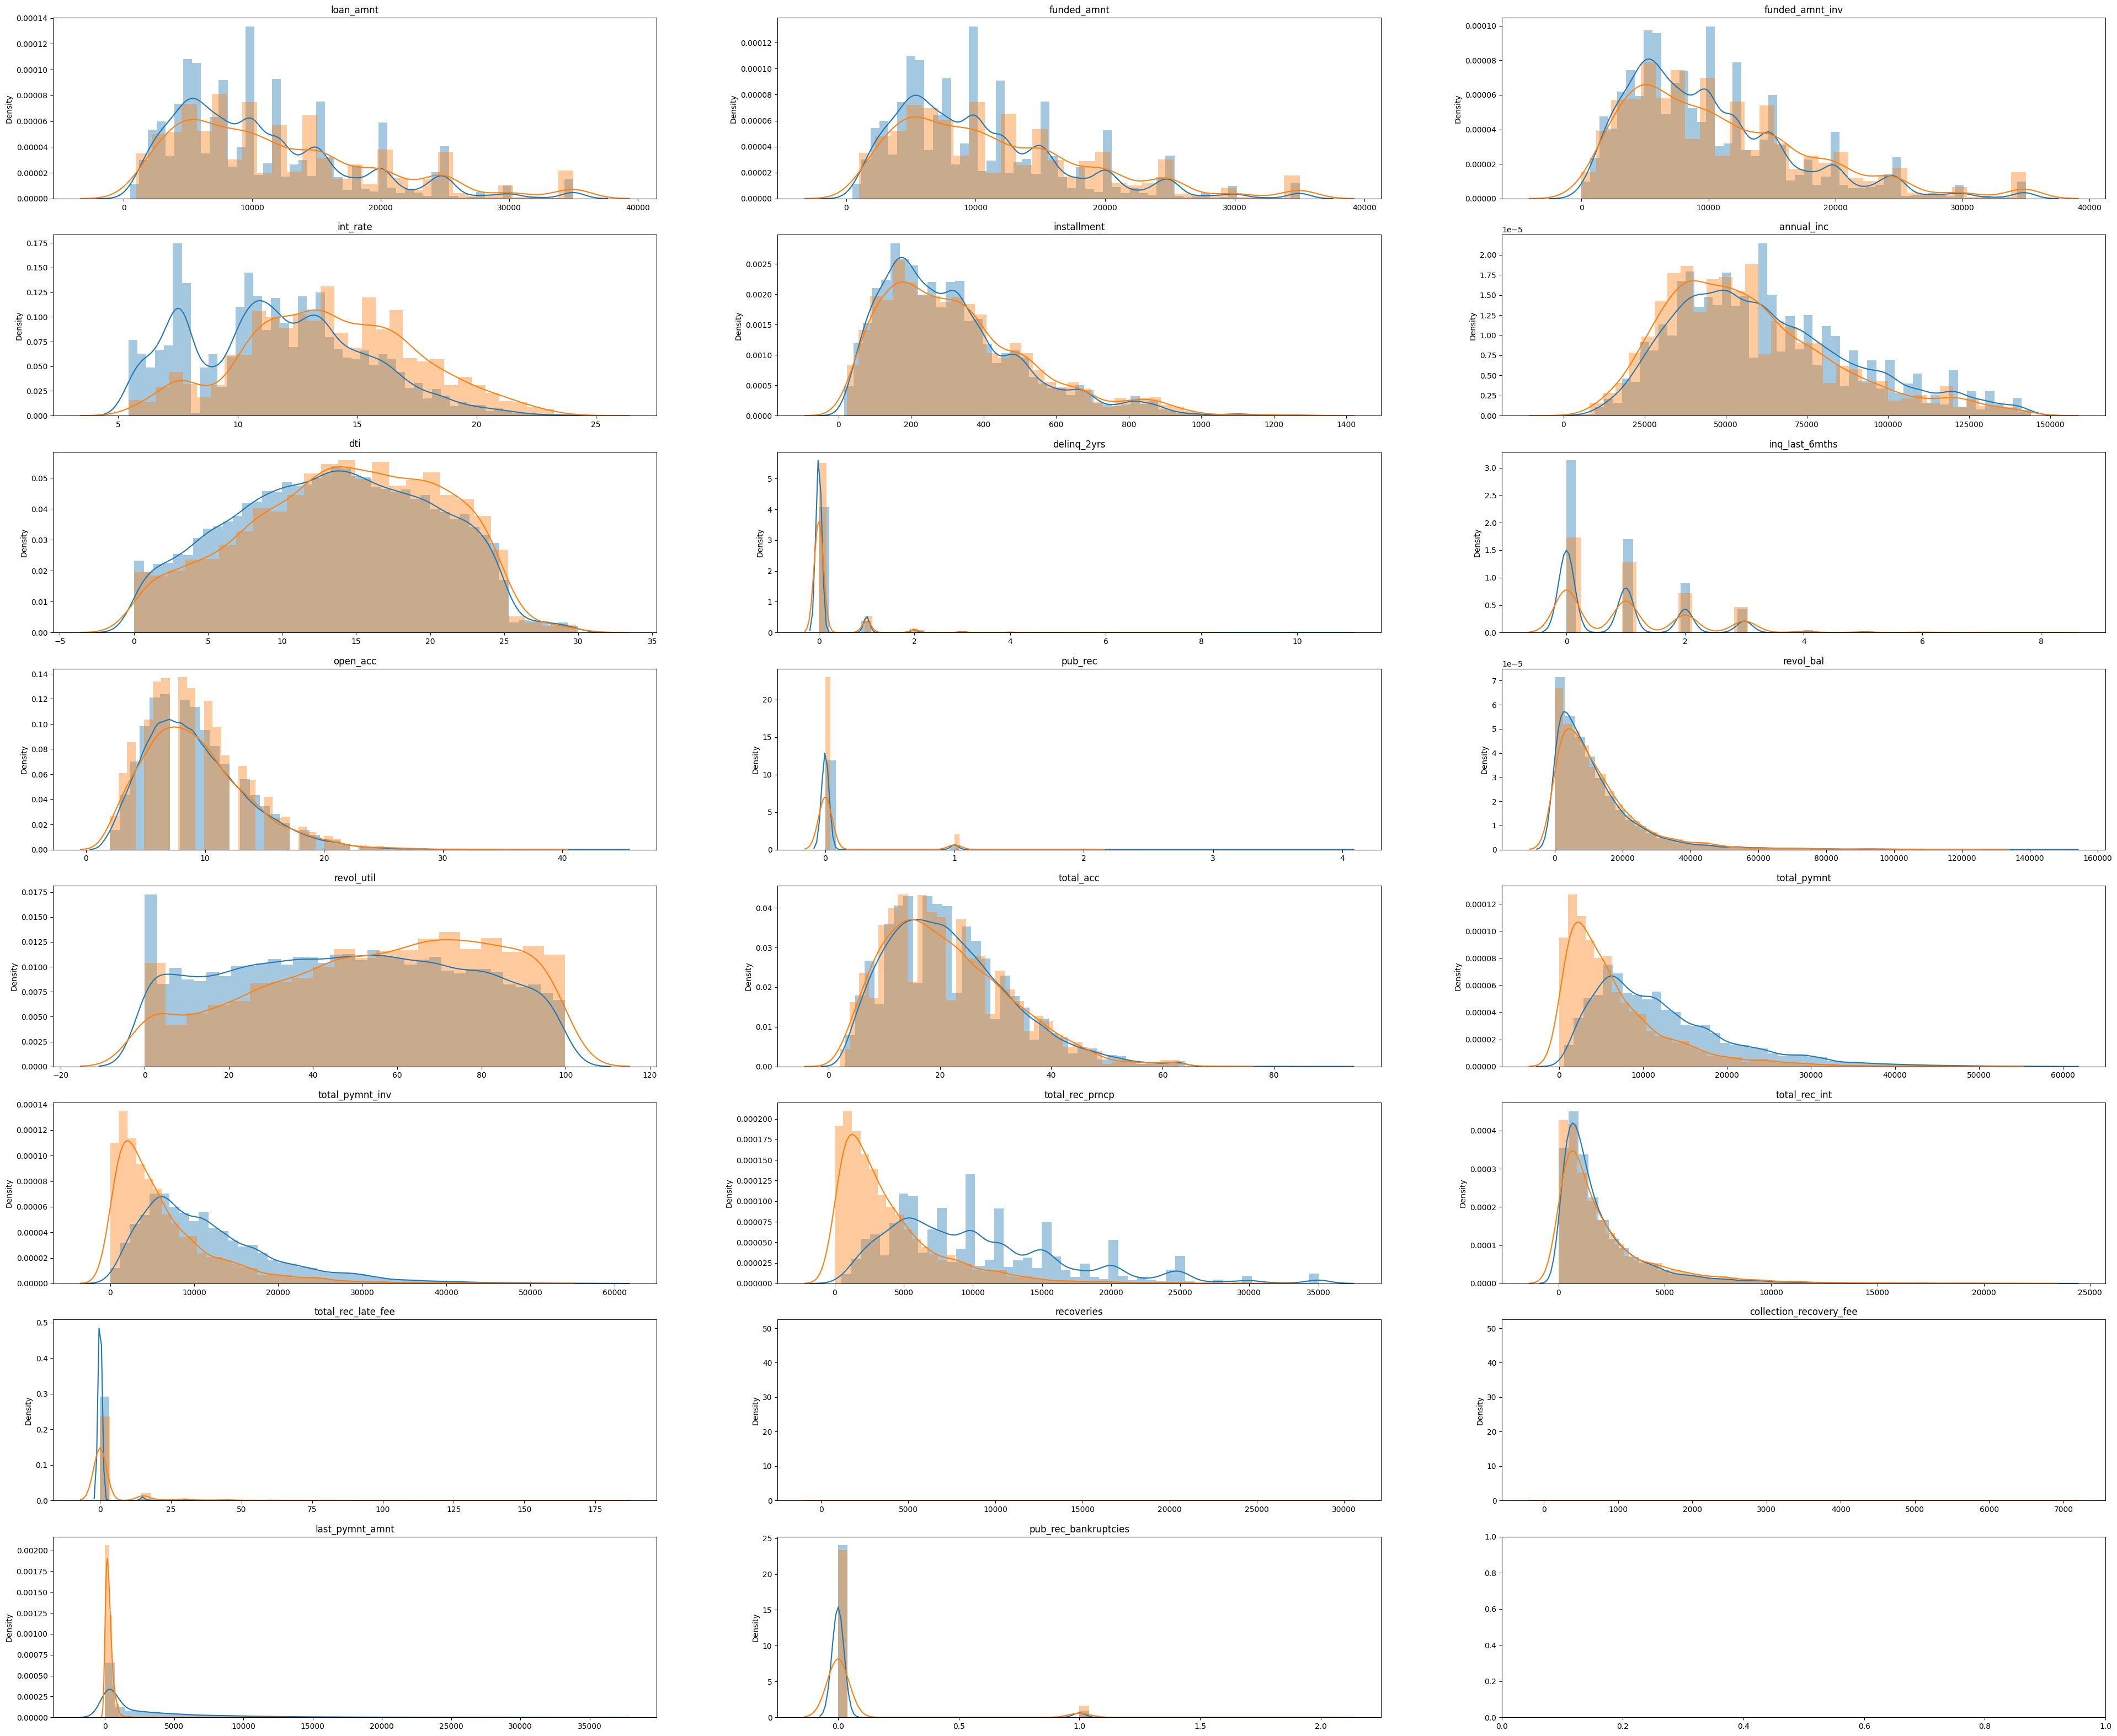

In [33]:
# this plot helps identify of there are any thresholds which can be used to identify if a loan would default or
# not with reasonable level of confidence.
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(48, 40))
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        sns.distplot(ax = ax[i][j], x = (data[data['loan_status'] == 'Fully Paid'])[data_features[ind]])
        sns.distplot(ax = ax[i][j], x = (data[data['loan_status'] == 'Charged Off'])[data_features[ind]])
        ax[i][j].set_title(data_features[ind])
        #plt.xticks(rotation = 90)
        ind = ind+1
        if ind >= len(data_features):
            break
plt.show()


## Observation

In above plot total_rec_prncp, total_pymnt, total_pymnt_inv can be used to identify if a loan would default or not with 
resonable level of confidence. As very brute-force approach we can use intersection of their PDF as threshold to identify a loan as default or charged off.

In [34]:
ind = 0
data_features = data_q.columns.to_list()

for i in range(8):
    for j in range(3):
        if ind >= len(data_features):
            break 
        print(data_features[ind], 'Fully Paid\n', (data[data['loan_status'] == 'Fully Paid'][data_features[ind]]).describe())
        print(data_features[ind], 'Charged Off\n', (data[data['loan_status'] == 'Charged Off'][data_features[ind]]).describe())
        ind = ind + 1

loan_amnt Fully Paid
 count    28977.000000
mean     10600.601339
std       6889.404978
min        500.000000
25%       5100.000000
50%       9250.000000
75%      14500.000000
max      35000.000000
Name: loan_amnt, dtype: float64
loan_amnt Charged Off
 count     4770.000000
mean     12018.674004
std       7894.139643
min       1000.000000
25%       6000.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
funded_amnt Fully Paid
 count    28977.000000
mean     10364.145702
std       6658.514636
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
funded_amnt Charged Off
 count     4770.000000
mean     11679.743187
std       7574.817821
min       1000.000000
25%       5750.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
funded_amnt_inv Fully Paid
 count    28977.000000
mean      9981.38051

## Observations

1. **loan_amount, funded_amnt and funded_amnt_inv** - these 3 features follow similar ternd where Mean and Median for loan_amount is slightly higher(mean +1418 and median +750) in case of defaults.
2. **int_rate** - min, max and median of intrest rates are higher incase of defaults.
3. **installments** - installments are slightly higher in case of defaults
4. **annual_inc** - although not significant annual income for defaults are lesser, but we cannot conclude anything from this data
5. **dti** - there is no significant difference in dti for charged off vs defauls not good enough to be conclusive data
6. **open_acc** - no significant difference.
7. **revol_bal** - there is no significant difference in revol_bal
8. **total_rec_prncp, total_pymnt, total_pymnt_inv** - total_rec_prncp, total_pymnt, total_pymnt_inv can be a good factor for default prediction. As very brute-force approach we can use intersection of their PDF as threshold to identify a loan as default or charged off.

 



In [35]:
data_q.corr().T

loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
loan_amnt                 1.000000     0.981699         0.951733  0.289540   
funded_amnt               0.981699     1.000000         0.970929  0.295554   
funded_amnt_inv           0.951733     0.970929         1.000000  0.286609   
int_rate                  0.289540     0.295554         0.286609  1.000000   
installment               0.930097     0.956101         0.921674  0.267449   
annual_inc                0.394154     0.389937         0.377049  0.046744   
dti                       0.088987     0.088764         0.091932  0.112439   
delinq_2yrs              -0.041896    -0.041660        -0.045154  0.155681   
inq_last_6mths           -0.000149     0.000963        -0.009512  0.134672   
open_acc                  0.163246     0.161492         0.152028 -0.004347   
pub_rec                  -0.040624    -0.041267        -0.045987  0.105060   
revol_bal                 0.317172     0.309404         0.292662  0.084559   
revol_util                0.071922     0.076502         0.079040  0.468943   
total_acc                 0.238738     0.233538         0.224836 -0.062669   
total_pymnt               0.879709     0.896891         0.882502  0.282838   
total_pymnt_inv           0.855507     0.873457         0.904689  0.275301   
total_rec_prncp           0.842541     0.860832         0.845782  0.164753   
total_rec_int             0.726693     0.735828         0.729250  0.518764   
total_rec_late_fee        0.044071     0.046348         0.032957  0.097408   
recoveries                0.145398     0.147222         0.139462  0.129666   
collection_recovery_fee   0.077760     0.079931         0.070149  0.073842   
last_pymnt_amnt           0.472487     0.477500         0.469624  0.167024   
pub_rec_bankruptcies     -0.024439    -0.025622        -0.031418  0.087883   

                         installment  annual_inc       dti  delinq_2yrs  \
loan_amnt                   0.930097    0.394154  0.088987    -0.041896   
funded_amnt                 0.956101    0.389937  0.088764    -0.041660   
funded_amnt_inv             0.921674    0.377049  0.091932    -0.045154   
int_rate                    0.267449    0.046744  0.112439     0.155681   
installment                 1.000000    0.388377  0.079032    -0.030694   
annual_inc                  0.388377    1.000000 -0.081166     0.028676   
dti                         0.079032   -0.081166  1.000000    -0.033688   
delinq_2yrs                -0.030694    0.028676 -0.033688     1.000000   
inq_last_6mths             -0.000665    0.032412  0.008746     0.007721   
open_acc                    0.158824    0.261484  0.301197     0.012706   
pub_rec                    -0.036713   -0.003167 -0.007588     0.012456   
revol_bal                   0.310635    0.403313  0.268646    -0.061866   
revol_util                  0.104926    0.043700  0.276714    -0.041656   
total_acc                   0.212808    0.388318  0.243763     0.066274   
total_pymnt                 0.856756    0.374103  0.084584    -0.032517   
total_pymnt_inv             0.829334    0.362804  0.087246    -0.036610   
total_rec_prncp             0.845721    0.375286  0.061974    -0.046950   
total_rec_int               0.639977    0.265824  0.121509     0.014588   
total_rec_late_fee          0.052901    0.005319 -0.009076     0.027846   
recoveries                  0.122181    0.040214  0.027428     0.010278   
collection_recovery_fee     0.076079    0.020256  0.011365     0.012102   
last_pymnt_amnt             0.410798    0.217587  0.020825    -0.014635   
pub_rec_bankruptcies       -0.022735    0.001287  0.005144     0.007119   

                         inq_last_6mths  open_acc   pub_rec  revol_bal  \
loan_amnt                     -0.000149  0.163246 -0.040624   0.317172   
funded_amnt                    0.000963  0.161492 -0.041267   0.309404   
funded_amnt_inv               -0.009512  0.152028 -0.045987   0.292662   
int_rate                       0.134672 -0.004347  0.10

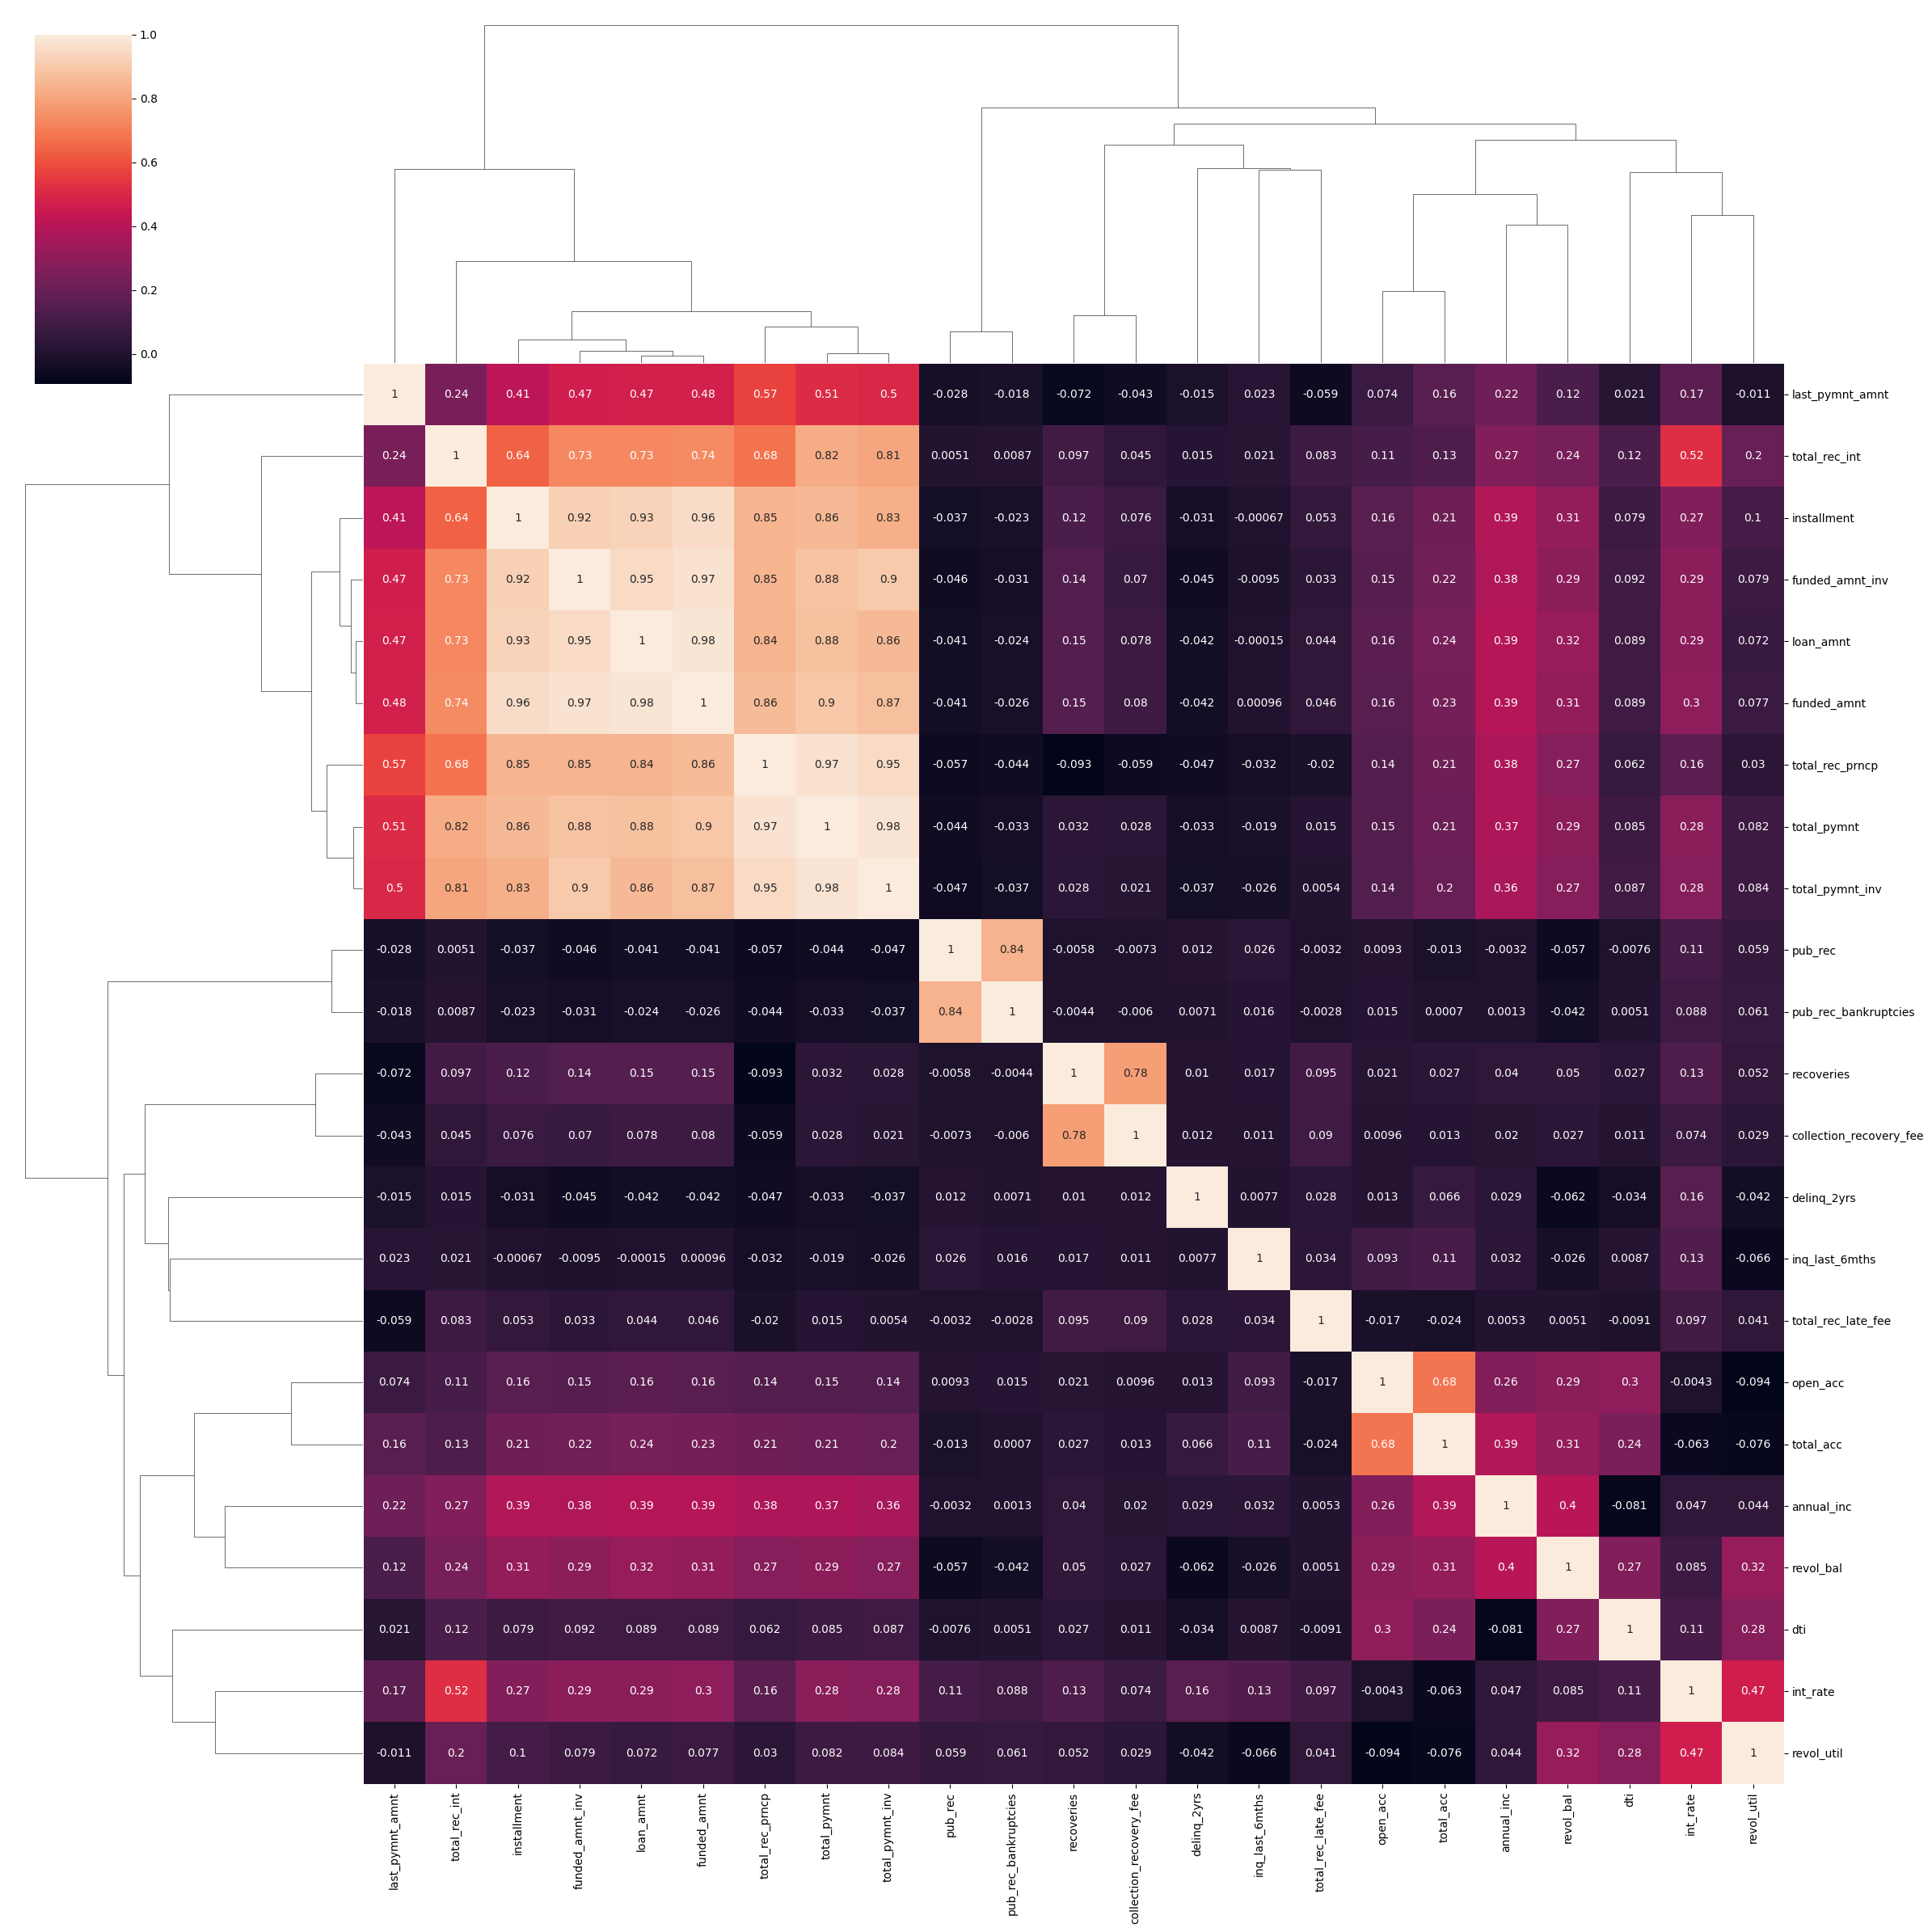

In [36]:
#sns.heatmap(data_q.corr(), cmap="YlGnBu", annot=True)
sns.clustermap(data_q.corr(),annot=True,figsize=(24, 24))
plt.show()

## Observation
1. open_acc and revol_util are most negatively correlated out of all features
2. annual_inc and dti are second most negatively correlated which makes sense as income increase (denominator or dti ratio increase) and dti would fall down.
3. loan_amnt, funded_amnt, funded_amnt_inv are strongly correlated 